# Gradient Boosting Machines (GBM)

## Description:
 Gradient Boosting Machines are powerful ensemble techniques known for their high effectiveness in classification and regression tasks. They build an ensemble of weak prediction models, typically decision trees, in a stage-wise fashion and optimize an arbitrary differentiable loss function.



In [1]:
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Example data
data = pd.read_csv('../input/preprocessed_data.csv') 
import helper

n_estimators: 1, RMSE: 1.8010707858070987
n_estimators: 2, RMSE: 1.750207476851692
n_estimators: 3, RMSE: 1.7108901042778877
n_estimators: 4, RMSE: 1.681944185963378
n_estimators: 5, RMSE: 1.6560992344048022
n_estimators: 6, RMSE: 1.6381204846231265
n_estimators: 7, RMSE: 1.6227300912937446
n_estimators: 8, RMSE: 1.6082001823362793
n_estimators: 9, RMSE: 1.592233364113344
n_estimators: 10, RMSE: 1.5875178196439355
n_estimators: 11, RMSE: 1.580567202617439
n_estimators: 12, RMSE: 1.5821535304413725
n_estimators: 13, RMSE: 1.5815003802014558
n_estimators: 14, RMSE: 1.5742854161214284
n_estimators: 15, RMSE: 1.5686705592011332
n_estimators: 16, RMSE: 1.570199072416576
n_estimators: 17, RMSE: 1.5719315472399553
n_estimators: 18, RMSE: 1.5695628216390451
n_estimators: 19, RMSE: 1.5685599414142681
n_estimators: 20, RMSE: 1.5659302422644583
n_estimators: 21, RMSE: 1.5648243627412173
n_estimators: 22, RMSE: 1.566267250294012
n_estimators: 23, RMSE: 1.5642188209085177
n_estimators: 24, RMSE: 1.

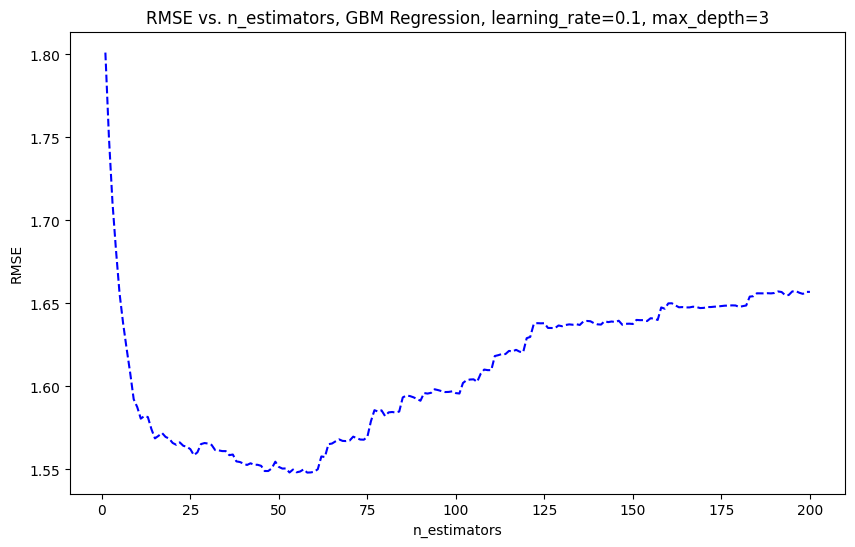

Best n_estimators: 58, RMSE: 1.5480739087921624


In [2]:

data = helper.remove_outliers_z_score(data)
X = data.drop('revenue', axis=1)
y = data['revenue']
y = y.apply(helper.revenue_log)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


n_estimators = np.linspace(1, 200, 200, dtype=int)
results = []
best_estimator = 0
best_rmse = 0

if (1):
    for n in n_estimators:
        model = GradientBoostingRegressor(n_estimators=n, learning_rate=0.1, max_depth=3, random_state=42)
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        mse = mean_squared_error(y_test, predictions)
        rmse = np.sqrt(mse)
        print(f'n_estimators: {n}, RMSE: {rmse}')
        results.append(rmse)
        if best_rmse == 0 or rmse < best_rmse:
            best_rmse = rmse
            best_estimator = n

    plt.figure(figsize=(10, 6))
    plt.plot(n_estimators, results, color='blue', linestyle='dashed', markersize=10)
    plt.title('RMSE vs. n_estimators, GBM Regression, learning_rate=0.1, max_depth=3')
    plt.xlabel('n_estimators')
    plt.ylabel('RMSE')
    plt.show()
    print(f'Best n_estimators: {best_estimator}, RMSE: {best_rmse}')


MSE: 2.0237733604704404
ratio
count    299.000000
mean       1.001191
std        0.090012
min        0.147546
25%        0.975869
50%        1.009309
75%        1.036970
max        1.249665
Name: revenue, dtype: float64


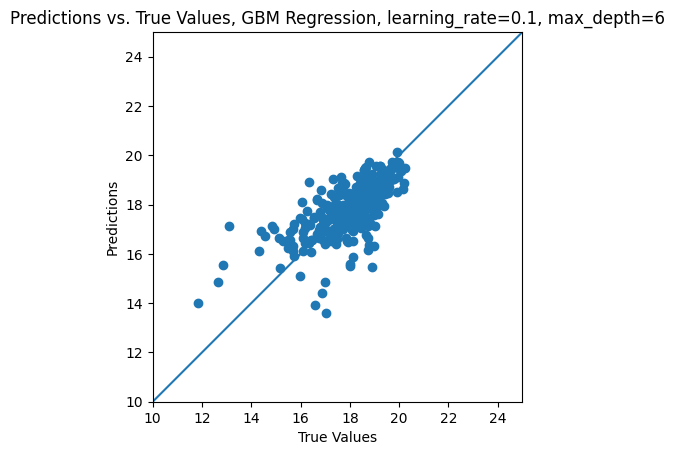

In [5]:
X = helper.data_standardizer(X,8)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

n = 58
model = GradientBoostingRegressor(n_estimators=n, learning_rate=0.1, max_depth=6, random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'MSE: {mse}')

plt.scatter(y_test, predictions)
plt.title('Predictions vs. True Values, GBM Regression, learning_rate=0.1, max_depth=6')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([10,25])
plt.ylim([10,25])
_ = plt.plot([-100, 100], [-100, 100])


ratio = y_test / predictions
print("ratio")
print(ratio.describe())